In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
data <- read.csv('MFG10YearTerminationData.csv')

In [3]:
data %>% head(10)

EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [4]:
data %>% select(STATUS) %>% unique

,STATUS
1,ACTIVE
48169,TERMINATED


In [11]:
data %>% group_by(job_title) %>% summarise(
    vol = n()
) %>% arrange(vol %>% desc)

job_title,vol
Meat Cutter,9984
Dairy Person,8590
Produce Clerk,8237
Baker,8096
Cashier,6816
Shelf Stocker,5622
Customer Service Manager,306
Processed Foods Manager,289
Bakery Manager,285
Meats Manager,285


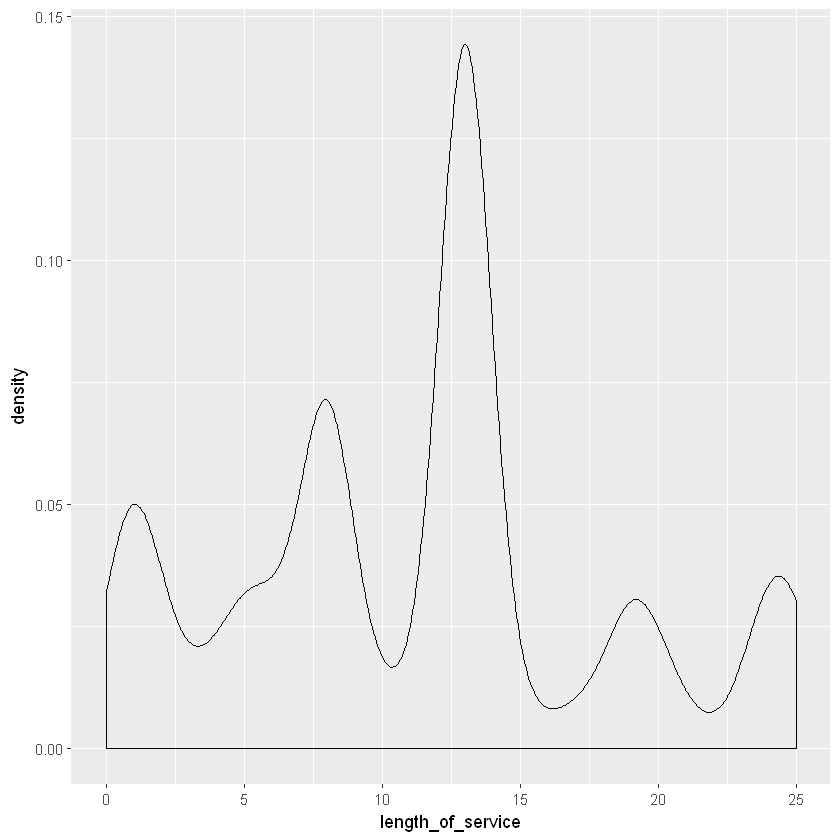

In [6]:
data %>% filter(STATUS == 'TERMINATED') %>%
#filter(job_title == 'Dairy Person') %>%
ggplot(aes(x = length_of_service)) + geom_density()

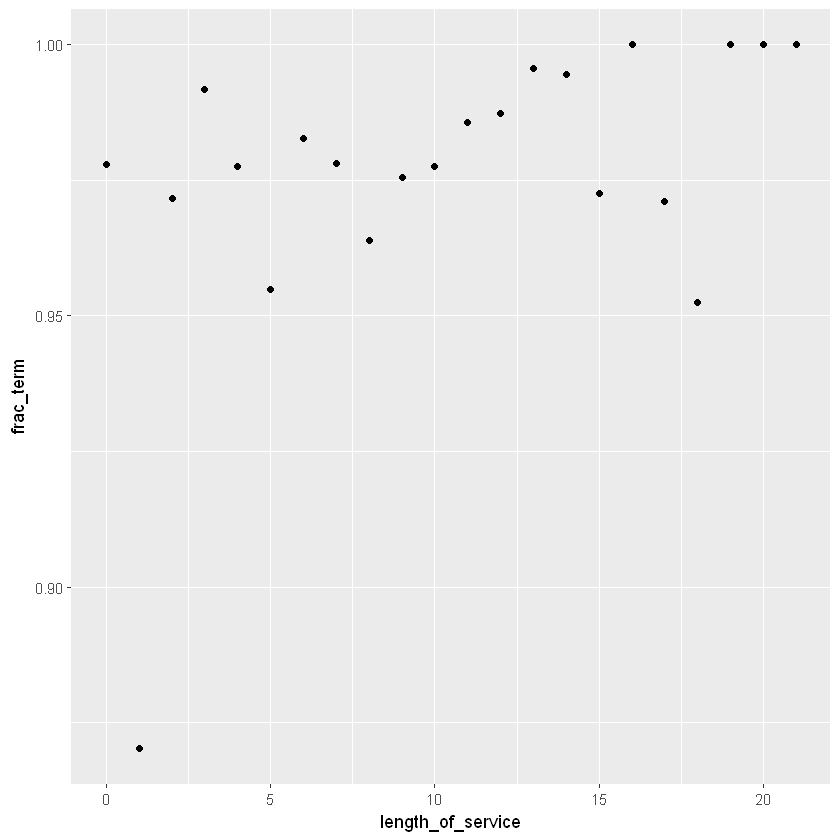

In [18]:
data %>% 
filter(job_title == 'Cashier') %>%
group_by(length_of_service) %>%
summarise(
    vol_active = sum(STATUS == 'ACTIVE'),
    vol_term = sum(STATUS == 'TERMINATED'),
    frac_active = sum(STATUS == 'ACTIVE') / (sum(STATUS == 'TERMINATED') + sum(STATUS == 'ACTIVE'))
) %>%
ggplot(aes(x = length_of_service, y = frac_term)) + geom_point()
